# DATA SCIENCE & BUSINESS ANALYTICS at THE SPARK FOUNDATION


#### Name:-Chandrakanti Bal

#### Task1:-Prediction Using Supervided ML.

#### Problem Statement:-Predict the Percentage of an Student based on the no of study hours.

# Importing the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
url='http://bit.ly/w-data'
data=pd.read_csv(url)
print("Data is imported.")
data.head()

Data is imported.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Preprocessing

In [4]:
data.isna().sum()


Hours     0
Scores    0
dtype: int64

In [5]:
hours = pd.DataFrame(data['Hours']) 
scores = pd.DataFrame(data['Scores']) 
x=hours.to_numpy()
y=scores.to_numpy()
print(type(x))
print(type(y))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


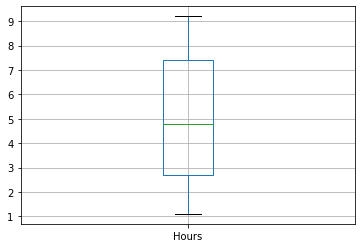

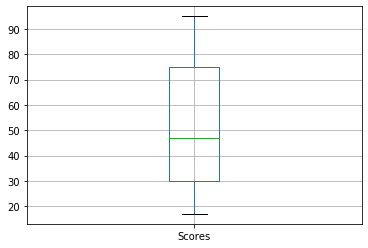

In [6]:
for columns in data.columns:
    plt.figure()
    data.boxplot([columns])


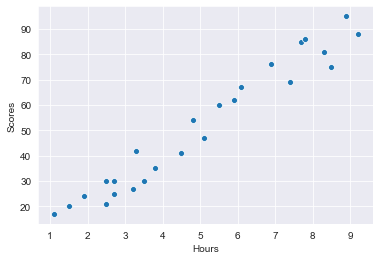

In [7]:
sns.set_style("darkgrid")
sns.scatterplot(data=data,x="Hours",y="Scores");

# Visitualizing the Features

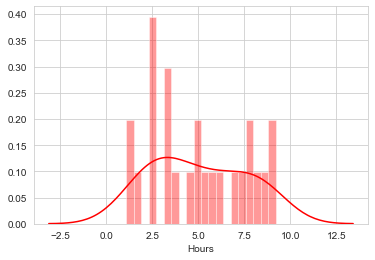

In [8]:
# Hours
sns.set_style('whitegrid')
sns.distplot(data["Hours"],kde=True,color='r',bins=20)


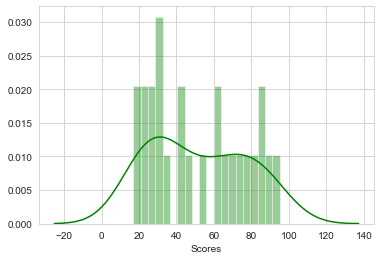

In [9]:
# Scores
sns.set_style('whitegrid')
sns.distplot(data["Scores"],kde=True,color='g',bins=20)


# Correlation

In [10]:
correlation=data.corr()
correlation


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


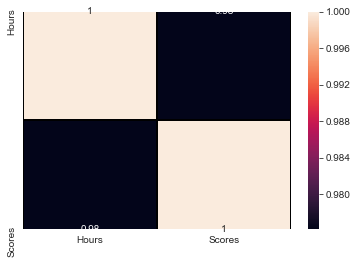

In [11]:
sns.heatmap(correlation,annot = True, linecolor ='black', linewidths = 1)


# Linear Regression


In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


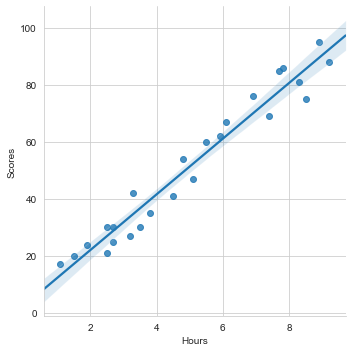

In [13]:
sns.set_style('whitegrid') 
sns.lmplot(x ='Hours', y ='Scores', data = data)


# Separating the data into training and testing

In [14]:
# train-test ratio is done in 80-20% where 80% is training ratio and 20% is testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [15]:
print("Printing Training set: \n{}".format(X_train))
print(" ")
print("Printing Testing set: \n{}".format(X_test))
print("Shape of splitted Training data: {}".format(X_train.shape))
print("Shape of splitted Testing data: {}".format(X_test.shape))


Printing Training set: 
[[4.8]
 [4.5]
 [6.1]
 [8.3]
 [2.5]
 [5.1]
 [8.5]
 [6.9]
 [2.7]
 [1.5]
 [3.2]
 [1.9]
 [3.8]
 [2.7]
 [5.9]
 [2.5]
 [3.3]
 [1.1]
 [7.8]
 [9.2]]
 
Printing Testing set: 
[[7.4]
 [3.5]
 [7.7]
 [5.5]
 [8.9]]
Shape of splitted Training data: (20, 1)
Shape of splitted Testing data: (5, 1)


# Model Fitting

In [16]:
fitting=lr.fit(X_train,y_train)


In [17]:
print("Prediction: ")
prediction=fitting.predict((X_test))
prediction
pred=prediction.tolist()
print("Perdicted:\n {}".format(pred))

Prediction: 
Perdicted:
 [[73.67957051435182], [36.87873568276399], [76.5104039629355], [55.75095867332185], [87.83373775727021]]


In [18]:
y_tests=y_test.tolist()
print(y_tests)

[[69], [30], [85], [60], [95]]


# Comparing the Actual and Predicted Value

In [19]:
datax=pd.DataFrame({
    'Actual':y_tests,
    'Predicted':pred
})
datax

,Actual,Predicted
0,[69],[73.67957051435182]
1,[30],[36.87873568276399]
2,[85],[76.5104039629355]
3,[60],[55.75095867332185]
4,[95],[87.83373775727021]


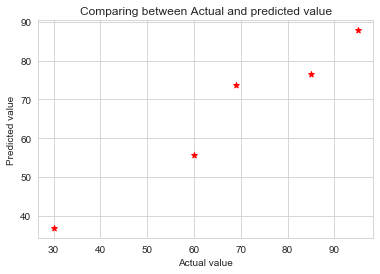

In [20]:
plt.title("Comparing between Actual and predicted value")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")

plt.scatter(y_tests,pred,color='r',marker='*')

# Accuracy

In [21]:
train_accuracy=fitting.score(X_train,y_train)
test_accuracy=fitting.score(X_test,y_test)
print("Training Score: {}".format(train_accuracy))
print("Testing Score: {}".format(test_accuracy))

Training Score: 0.9523241653059769
Testing Score: 0.9166145748013075


# Root Mean Squared Error

In [22]:
from sklearn.metrics import mean_squared_error as rmse
w=np.sqrt(rmse(y_test,prediction))
print("Root mean Squarred Error {}".format(w))

Root mean Squarred Error 6.491506641636535


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [23]:
test_data=np.array([[9.25]])
test_data
final_prediction=fitting.predict(test_data)
final_prediction

array([[91.13637678]])